Loading and Visualizing Data ...


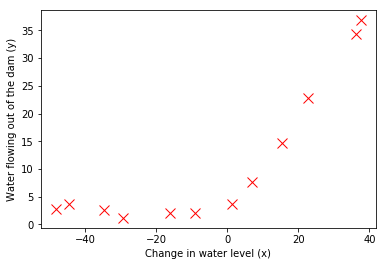

In [42]:
## =========== Part 1: Loading and Visualizing Data =============
from __future__ import print_function

import scipy.io
import numpy as np
import matplotlib.pyplot as plt

# Load Training Data
print('Loading and Visualizing Data ...')

mat = scipy.io.loadmat('./data/ex5data1.mat')

X = mat['X']
y = mat['y']

Xval = mat["Xval"]
yval = mat["yval"]
Xtest = mat["Xtest"]
ytest = mat["ytest"]

# size of the dataset
m = X.shape[0]

# Plot training data
plt.plot(X, y, 'rx', markersize=10, linewidth=1.5)
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')
plt.show(block=False) 

In [135]:
class LinearRegression(object):
    def __init__(self, n_iters=200):
        self.n_iters = n_iters
        
    def fit(self, X, y, theta, lambda_val):
        m = len(y) 
    
        theta = np.reshape(theta, (-1,y.shape[1]))
        J = 0
        grad = np.zeros(theta.shape)

        # cost function
        J = ( 1./(2*m)) * np.power( (np.dot(X, theta) - y) , 2).sum() + ( float(lambda_val) / (2*m)) * np.power(theta[1:theta.shape[0]],2).sum()

        # regularized gradient
        grad = (1./m) * np.dot( X.T, np.dot(X,theta) - y) + ( float(lambda_val) / m )*theta

        # unregularize first gradient
        grad_no_regularization = (1./m) * np.dot( X.T, np.dot(X,theta) - y)
        grad[0] = grad_no_regularization[0]
            
        return J, grad.flatten()
    
    def transform(self,X, y, lambda_val):
   
        # Initialize Theta
        initial_theta = np.zeros((X.shape[1], 1))

        # Short hand for cost function to be minimized
        def costFunc(theta):
            return lr.fit(X, y, theta, lambda_val)

        # Now, costFunction is a function that takes in only one argument
        maxiter = 200
        results = minimize(costFunc, x0=initial_theta, options={'disp': True, 'maxiter':maxiter}, method="L-BFGS-B", jac=True)

        theta = results["x"]
        return theta
    
    def predict(self, X, theta):
        # calculate dot product of test set with learned parameters       
        return np.dot(X, theta)

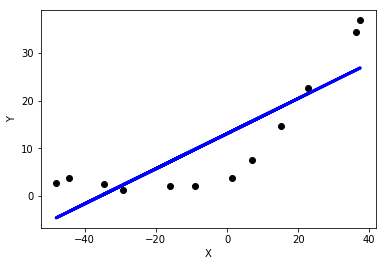

 1) 7.22669487978                  2.134311
 2) 2.36604326956                  1.173257
 3) 26.3976678296                  34.359109
 4) 26.8767512893                  36.837955
 5) -4.58713576767                 2.808965
 6) 9.79942099761                  2.121072
 7) 18.7177917888                  14.710268
 8) 0.323659803433                 2.614184
 9) 13.5988056346                  3.740172
10) -3.2355215006                  3.731691
11) 15.6673239046                  7.627659
12) 21.4595697755                  22.752428


In [150]:
from scipy.optimize import minimize

# Initialize Theta
theta = np.array([[1] , [1]])

X_padded = np.column_stack((np.ones((m,1)), X))

lr = LinearRegression()
lr.fit(X_padded, y, theta, 1)

#  Train linear regression with lambda = 0
theta = lr.transform(X_padded, y, 0)
y_pred = lr.predict(X_padded, theta)

# Plot outputs 
plt.scatter(X, y,  color='black')
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(X, y_pred, color='blue', linewidth=3)
plt.show()

for f in range(y_pred.shape[0]):
    print("%2d) %-*s %2f" % (f + 1, 30, y_pred[f], y[f]))